In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### Data Preprocessing :

In [4]:
df.shape

(400, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [8]:
# No. of duplicated rows
df.duplicated().sum()

0

In [9]:
df['Age'].value_counts()

Age
35    32
37    20
26    16
41    16
42    16
39    15
40    15
48    14
47    14
27    13
38    13
28    12
36    12
46    12
31    11
30    11
49    10
29    10
33     9
32     9
24     9
59     7
19     7
45     7
20     7
60     7
34     6
23     6
52     6
25     6
58     6
53     5
57     5
22     5
18     5
21     4
50     4
54     4
55     3
56     3
51     3
43     3
44     2
Name: count, dtype: int64

In [10]:
df['Purchased'].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [11]:
df['EstimatedSalary'].value_counts()

EstimatedSalary
72000     12
80000     11
79000     10
75000      9
71000      9
          ..
123000     1
37000      1
115000     1
148000     1
139000     1
Name: count, Length: 117, dtype: int64

In [12]:
df['Gender'].value_counts()

Gender
Female    204
Male      196
Name: count, dtype: int64

In [13]:
# Drop 'UserID' column as it is not needed for analysis
df.drop('User ID', axis=1, inplace=True)

### EDA :-

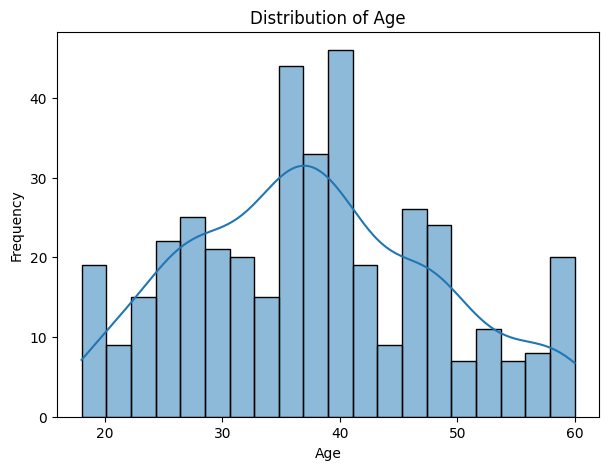

In [14]:
# Histogram for 'Age'
plt.figure(figsize=(7, 5))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

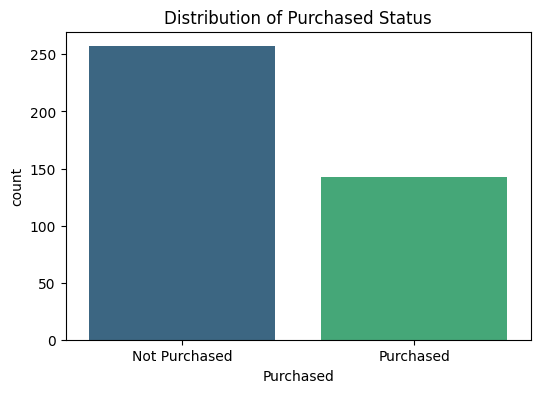

In [15]:
# Countplot for 'Purchased'
plt.figure(figsize=(6, 4))
sns.countplot(x='Purchased', data=df,palette='viridis')
plt.title('Distribution of Purchased Status')
plt.xticks([0, 1], ['Not Purchased', 'Purchased'])
plt.show()

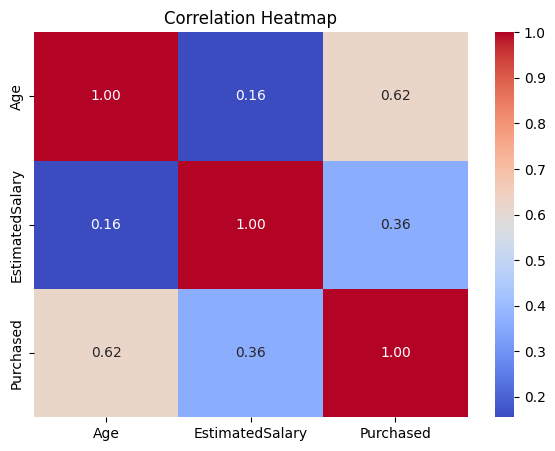

In [16]:
# Correlation heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### Model Building :

In [17]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [18]:
print(dict(enumerate(le.classes_)))


{0: 'Female', 1: 'Male'}


In [19]:
df.sample(5)

,Gender,Age,EstimatedSalary,Purchased
198,1,26,80000,0
77,0,22,27000,0
391,1,47,23000,1
330,1,38,51000,0
160,1,32,100000,1


In [20]:
X_train , X_test, y_train, y_test = train_test_split(df.drop(['Purchased'], axis=1),
                                                    df['Purchased'], 
                                                    test_size=0.2, random_state=42)

In [21]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape )

(320, 3) (80, 3)
(320,) (80,)


### Logistic Regression Classifier :

In [22]:
# lr = LogisticRegression()   # Using SKLearn
# lr.fit(X_train, y_train)

In [ ]:
from sklearn.preprocessing import StandardScaler

class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.1, n_iterations=5000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.scaler = StandardScaler()  # For feature scaling
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-np.clip(z, -250, 250)))  # Prevent overflow
    
    def fit(self, X, y):
        X = self.scaler.fit_transform(X)   # Scale features
        X = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias column

        self.theta = np.zeros(X.shape[1])   #Initializes model's parameters(weights)
        m = len(y)

        for _ in range(self.n_iterations):
            z = np.dot(X, self.theta)
            predictions = self.sigmoid(z)

            # Gradient descent update
            gradient = (1 / m) * np.dot(X.T, (predictions - y))
            self.theta -= self.learning_rate * gradient
    
    def predict_proba(self, X):
        X = self.scaler.transform(X)
        X = np.c_[np.ones((X.shape[0], 1)), X]
        return self.sigmoid(np.dot(X, self.theta))
    
    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int)


# Train logistic regression 
lr = LogisticRegressionScratch(learning_rate=0.1, n_iterations=8000)
lr.fit(X_train.values, y_train.values)


In [24]:
# Predict
y_pred = lr.predict(X_test.values)

# Evaluate
print("👉 Classification Report of Logistic Regression :\n")
print(classification_report(y_test, y_pred))

👉 Classification Report of Logistic Regression :

              precision    recall  f1-score   support

           0       0.88      0.96      0.92        52
           1       0.91      0.75      0.82        28

    accuracy                           0.89        80
   macro avg       0.90      0.86      0.87        80
weighted avg       0.89      0.89      0.88        80



### Decision Tree Classifier :

In [ ]:
# clf = DecisionTreeClassifier()   # Using sklearn
# clf.fit(X_train, y_train)

In [26]:
from collections import Counter

# Node class for the decision tree
class Node:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, value=None):
        self.feature_index = feature_index   # Which feature to split on
        self.threshold = threshold           # Threshold for split
        self.left = left                     # Left child
        self.right = right                   # Right child
        self.value = value                   # Value for leaf node

# Decision Tree Classifier from scratch
class DecisionTreeClassifierScratch:
    def __init__(self, max_depth=5, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.root = None

    def gini(self, y):
        """Calculate Gini Impurity."""
        counts = Counter(y)
        impurity = 1
        for label in counts:
            prob = counts[label] / len(y)
            impurity -= prob ** 2

        return impurity

    def best_split(self, X, y):
        """Find the best feature and threshold for splitting."""
        m, n = X.shape
        if m <= 1:
            return None, None

        best_gain = 0
        split_index, split_threshold = None, None
        parent_impurity = self.gini(y)

        for feature_index in range(n):
            thresholds = np.unique(X[:, feature_index])
            for t in thresholds:
                left_idx = X[:, feature_index] <= t
                right_idx = X[:, feature_index] > t

                if (sum(left_idx) == 0 or sum(right_idx) == 0):
                    continue

                # Weighted impurity
                n_left, n_right = sum(left_idx), sum(right_idx)
                gini_left = self.gini(y[left_idx])
                gini_right = self.gini(y[right_idx])
                weighted_gini = (n_left / m) * gini_left + (n_right / m) * gini_right

                gain = parent_impurity - weighted_gini
                if gain > best_gain:
                    best_gain = gain
                    split_index = feature_index
                    split_threshold = t

        return split_index, split_threshold

    def build_tree(self, X, y, depth=0):
        """Recursively build the tree."""
        num_samples, num_features = X.shape
        num_labels = len(set(y))

        # Stop if max depth reached or only one class remains
        if (depth >= self.max_depth or num_labels == 1 or num_samples < self.min_samples_split):
            leaf_value = Counter(y).most_common(1)[0][0]
            return Node(value=leaf_value)

        feature_index, threshold = self.best_split(X, y)
        if feature_index is None:
            leaf_value = Counter(y).most_common(1)[0][0]
            return Node(value=leaf_value)

        left_idx = X[:, feature_index] <= threshold
        right_idx = X[:, feature_index] > threshold

        left_child = self.build_tree(X[left_idx], y[left_idx], depth + 1)
        right_child = self.build_tree(X[right_idx], y[right_idx], depth + 1)

        return Node(feature_index, threshold, left_child, right_child)

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        self.root = self.build_tree(X, y)

    def predict_one(self, x, tree):
        """Predict a single data point."""
        if tree.value is not None:
            return tree.value
        if x[tree.feature_index] <= tree.threshold:
            return self.predict_one(x, tree.left)
        else:
            return self.predict_one(x, tree.right)

    def predict(self, X):
        X = np.array(X)
        return np.array([self.predict_one(sample, self.root) for sample in X])


clf = DecisionTreeClassifierScratch(max_depth=5, min_samples_split=2)
clf.fit(X_train.values, y_train.values)
y_pred = clf.predict(X_test.values)

# Evaluation
print("👉 Classification Report of Decision Tree :\n")
print(classification_report(y_test, y_pred))


👉 Classification Report of Decision Tree :

              precision    recall  f1-score   support

           0       0.98      0.90      0.94        52
           1       0.84      0.96      0.90        28

    accuracy                           0.93        80
   macro avg       0.91      0.93      0.92        80
weighted avg       0.93      0.93      0.93        80



### K-Nearest Neighbor Classifier :

In [27]:
class KNearestNeighborsScratch:
    def __init__(self, k=5):
        self.k = k
    
    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)
    
    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))
    
    def predict_one(self, x):
        # Compute distances from x to all training points
        distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]
        
        # Get indices of k nearest neighbors
        k_indices = np.argsort(distances)[:self.k]
        
        # Get the labels of the k neighbors
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        
        # Majority vote
        most_common = Counter(k_nearest_labels).most_common(1)[0][0]
        return most_common
    
    def predict(self, X):
        return np.array([self.predict_one(x) for x in np.array(X)])


# Train KNN
knn = KNearestNeighborsScratch(k=6)
knn.fit(X_train.values, y_train.values)

# Predict
y_pred = knn.predict(X_test.values)

# Evaluation
print("👉 Classification Report of KNN :\n")
print(classification_report(y_test, y_pred))

👉 Classification Report of KNN :

              precision    recall  f1-score   support

           0       0.89      0.90      0.90        52
           1       0.81      0.79      0.80        28

    accuracy                           0.86        80
   macro avg       0.85      0.84      0.85        80
weighted avg       0.86      0.86      0.86        80



### Prediction :

In [28]:
# Take input from the user
gender_input = input("Enter Gender : ").strip().capitalize()
age_input = int(input("Enter Age : "))
salary_input = int(input("Enter Estimated Salary : "))

# Encode gender
gender_encoded = le.transform([gender_input])[0]

# Create a DataFrame for prediction
user_data = pd.DataFrame([[gender_encoded, age_input, salary_input]],
                         columns=['Gender', 'Age', 'EstimatedSalary'])

# Logistic Regression Prediction
lr_prediction = lr.predict(user_data.values)[0]
lr_result = "Purchased✅" if (lr_prediction == 1) else "Not Purchased❌"

# Decision Tree Prediction
dt_prediction = clf.predict(user_data)[0]
dt_result = "Purchased✅" if (dt_prediction == 1) else "Not Purchased❌"

# KNN Prediction
knn_prediction = knn.predict(user_data.values)[0]
knn_result = "Purchased✅" if (knn_prediction == 1) else "Not Purchased❌"

# Show results
print(" --- Prediction Results ---")
print(f"Logistic Regression : {lr_result}")
print(f"Decision Tree : {dt_result}")
print(f"KNN : {knn_result}")

 --- Prediction Results ---
Logistic Regression : Not Purchased❌
Decision Tree : Not Purchased❌
KNN : Not Purchased❌


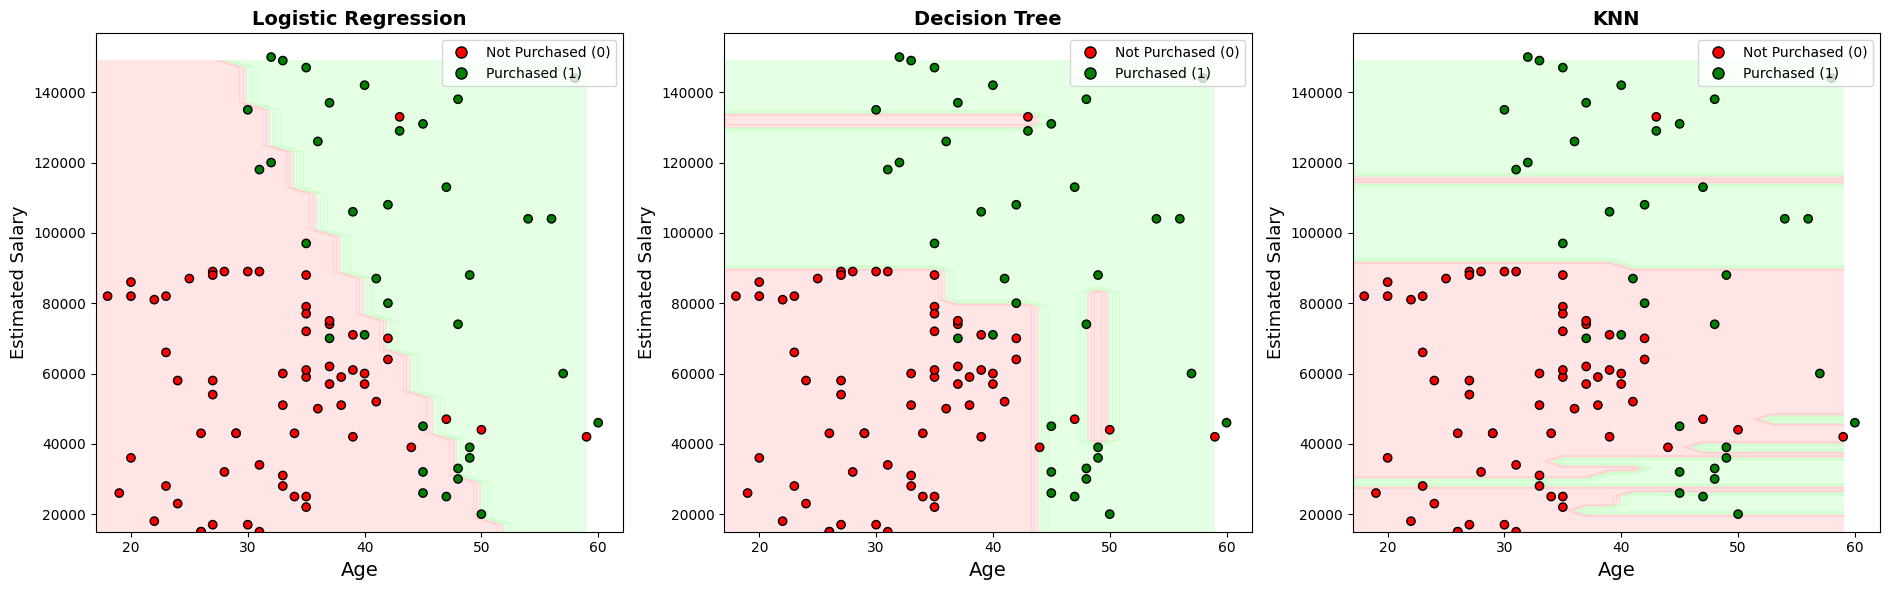

In [33]:
from matplotlib.colors import ListedColormap

def plot_decision_boundaries(models, X, y, titles, gender_fixed=1, sample_size=100):
    # Subsample dataset for clarity
    if len(X) > sample_size:
        X_sample = X.sample(sample_size, random_state=42)
        y_sample = y.loc[X_sample.index]
    else:
        X_sample, y_sample = X, y

    X_plot = X_sample[['Age', 'EstimatedSalary']].values
    y_sample = np.array(y_sample)

    # Create meshgrid 
    x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
    y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 2),
                         np.arange(y_min, y_max, 2000))
    grid_points = np.c_[np.full(xx.ravel().shape, gender_fixed), xx.ravel(), yy.ravel()]

    plt.figure(figsize=(19, 6))

    for i, (model, title) in enumerate(zip(models, titles), 1):
        Z = model.predict(grid_points).reshape(xx.shape)

        plt.subplot(1, len(models), i)
        plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAFFAA']))
        scatter = plt.scatter(X_plot[:, 0], X_plot[:, 1],
                              c=y_sample,
                              cmap=ListedColormap(['red', 'green']),
                              edgecolor='k',
                              label=y_sample)

        # Add legend manually (assuming 0 = Not Purchased, 1 = Purchased)
        from matplotlib.lines import Line2D
        legend_elements = [
            Line2D([0], [0], marker='o', color='w', label='Not Purchased (0)',
                   markerfacecolor='red', markersize=8, markeredgecolor='k'),
            Line2D([0], [0], marker='o', color='w', label='Purchased (1)',
                   markerfacecolor='green', markersize=8, markeredgecolor='k')
        ]
        plt.legend(handles=legend_elements, loc="upper right")

        plt.xlabel("Age",fontsize=14)
        plt.ylabel("Estimated Salary",fontsize=13)
        plt.title(title,fontsize=14,fontweight='bold')

    plt.tight_layout()
    plt.show()

# Use the function with sampling
models = [lr, clf, knn]
titles = ["Logistic Regression", "Decision Tree", "KNN"]

plot_decision_boundaries(models, X_train, y_train, titles, sample_size=100)
